In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 



In [3]:
data

NameError: name 'data' is not defined

In [3]:
data=pd.read_csv("week of stream_graph - Sheet1.csv")


In [4]:
df=data.pivot_table(index='Week', columns='Stressors', values='Count')
df=df.fillna(0)
df=df.reset_index()

In [5]:
data.loc[data["Stressors"]=="Social Media"]

,Stressors,Count,Week
108,Social Media,0.0,1.0
109,Social Media,1.0,2.0
110,Social Media,0.0,3.0
111,Social Media,0.0,4.0
112,Social Media,1.0,5.0
113,Social Media,0.0,6.0
114,Social Media,7.0,7.0


In [6]:
df

Stressors,Week,Finance,Friends/Family,Health,Personal,Safety,Social Media,Transportation
0,1.0,2.0,0.0,4.0,1.0,1.0,0.0,1.0
1,2.0,5.0,1.0,2.0,2.0,1.0,1.0,2.0
2,3.0,1.0,0.0,4.0,4.0,2.0,0.0,1.0
3,4.0,2.0,0.0,5.0,1.0,1.0,0.0,1.0
4,5.0,1.0,0.0,4.0,1.0,4.0,1.0,0.0
5,6.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0
6,7.0,1.0,2.0,1.0,1.0,0.0,7.0,1.0


TypeError: tuple indices must be integers or slices, not tuple

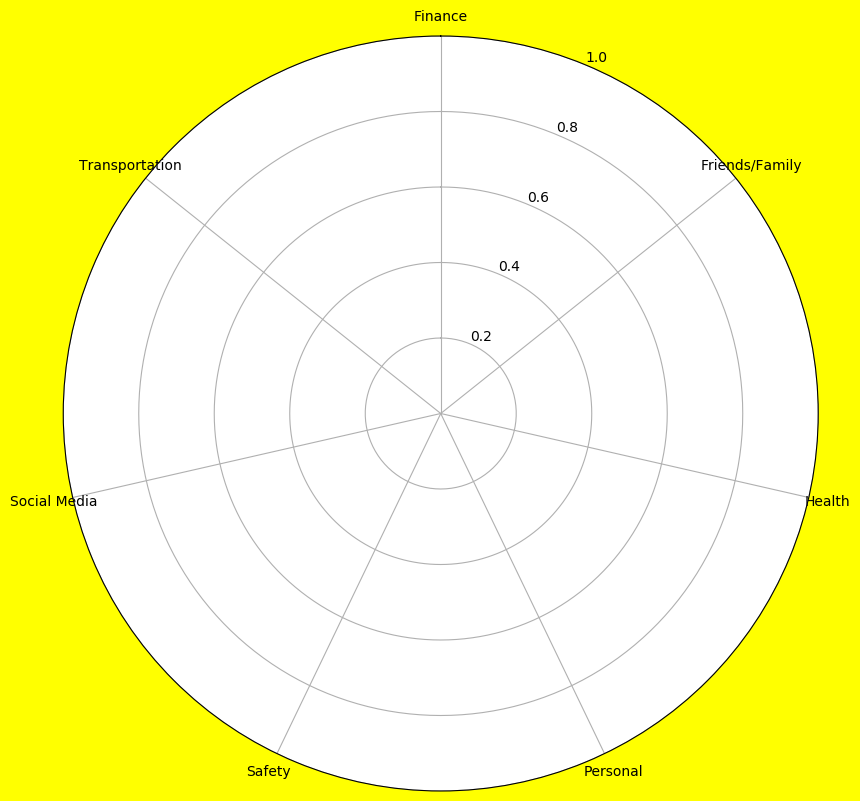

In [7]:
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
fig  = plt.figure(figsize=(10,10),facecolor = 'yellow', dpi=100) 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)["Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety"]
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,3,5,7], ["1","3","5","7"], color="grey", size=7)
plt.ylim(0,7)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('Week').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Week 1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('Week').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Week 2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind1
values=df.loc[2].drop('Week').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Week 3")
ax.fill(angles, values, 'y', alpha=0.1)
 
# Ind2
values=df.loc[3].drop('Week').values.flatten().tolist()
print(values)
values += values[:1]

ax.plot(angles, values, linewidth=1, linestyle='solid', label="Week 4")
ax.fill(angles, values, 'g', alpha=0.1)

 
# Ind2
values=df.loc[4].drop('Week').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Week 5")
ax.fill(angles, values, 'm', alpha=0.1)

# Ind1
values=df.loc[5].drop('Week').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Week 6")
ax.fill(angles, values, 'k', alpha=0.1)
 
# Ind2
values=df.loc[6].drop('Week').values.flatten().tolist()
print(values)
values += values[:1]

ax.plot(angles, values, linewidth=1, linestyle='solid', label="Week 7")
ax.fill(angles, values, 'r', alpha=0.1)
 
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig("radar.png")

In [8]:
import plotly.graph_objects as go
import plotly

fig = go.Figure()
temp=["Week 1 ","Week 2","Week 3","Week 4","Week 5","Week 6",
                            "Week 7","Week 8"]
fig.add_trace(go.Barpolar(
    r = list(df['Finance']),
    theta=temp,
    name = 'Finance',
    marker_color='rgb(46,109,255)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.5  
))


fig.add_trace(go.Barpolar(
    r = list(df['Friends/Family']),
    theta=temp,
    name = 'Friends/Family',
    marker_color='rgb(139,222,52)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

fig.add_trace(go.Barpolar(    
    r = list(df['Health']),
    theta=temp,
    name = 'Health',
    marker_color='teal', 
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))
fig.add_trace(go.Barpolar(
    r = list(df['Personal']),
    theta=temp,
    name = 'Personal',
    marker_color='darkolivegreen',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7   
))


fig.add_trace(go.Barpolar(
    r = list(df['Safety']),
    theta=temp,
    name = 'Safety',
    marker_color='deeppink',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

fig.add_trace(go.Barpolar(    
    r = list(df['Social Media']),
    theta=temp,
    name = 'Social Media',
    marker_color='chocolate', 
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))
fig.add_trace(go.Barpolar(    
    r = list(df['Transportation']),
    theta=temp,
    name = 'Transportation',
    marker_color='purple', 
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

fig.update_layout(
    title='Stressors over weeks',
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=90,
    width=1000,
    height=1000,
    
    polar = dict(
              bgcolor = "rgb(223, 223, 223)",
              angularaxis = 
                dict(
                    linewidth = 7,
                    showline=True,
                    linecolor='black'
                    ),
          radialaxis = 
                dict(  
                    
                    showline = True,
                    linewidth = 2,
                    gridcolor = "white",
                    gridwidth = 2,
                    )
                ),

            )
#fig.show()
plotly.offline.plot(fig, filename='Stressors.html')

'Stressors.html'

'test.html'

In [10]:
import plotly.graph_objects as go
import plotly
import plotly.express as px

fig = go.Figure()
temp=["Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety"]

stressors_dict={"Stressors":["Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety","Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety","Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety","Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety"],
                "Frequency":[5,1,3,7,3,1,4,4,6,1,5,4,5,2,3,4,5,1,3,7,3,1,4,4,6,1,5,4,5,2,3,4],"Week":[1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4]}
print(len(stressors_dict["Week"]))
df1=pd.DataFrame.from_dict(stressors_dict)
fig = px.bar_polar(df1, r="Frequency", theta="Stressors",
                   color="Week", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.haline)
fig.update_layout(
    title='Stressors over weeks',
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=90,
    width=1000,
    height=1000,
    
    polar = dict(
              bgcolor = "rgb(223, 223, 223)",
              angularaxis = 
                dict(
                    linewidth = 7,
                    showline=True,
                    linecolor='black'
                    ),
          radialaxis = 
                dict(  
                    
                    showline = True,
                    linewidth = 2,
                    gridcolor = "white",
                    gridwidth = 2,
                    )
                ),

            )
#fig.show()
plotly.offline.plot(fig, filename='Stressors_week.html')

32


'Stressors_week.html'

In [15]:
r = list(df['Finance'])
print(r)

[2.0, 5.0, 1.0, 2.0, 1.0, 0.0, 1.0]


In [55]:
data

,Stressors,Count,Week
0,Health,4.0,1.0
1,Health,2.0,2.0
2,Health,4.0,3.0
3,Health,5.0,4.0
4,Finance,2.0,1.0
...,...,...,...
132,Friends/Family,0.0,3.0
133,Friends/Family,0.0,4.0
134,Friends/Family,0.0,5.0
135,Friends/Family,0.0,6.0
